In [80]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Loading the dataset
data = pd.read_csv("part_a_data.csv")

In [82]:
# Data head
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
# Target Values
data['diagnosis'].head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [84]:
# Loading features and target
X = data.iloc[:, 2:33].values  
y = data.iloc[:, 1].values 

In [85]:
# Splitting the dataset into Training and Test Set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [86]:
# Transforming Feature Values
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [87]:
# Fitting Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
# Predicting Metric
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.06432748538011696
[[103   1]
 [ 10  57]]
             precision    recall  f1-score   support

          B       0.91      0.99      0.95       104
          M       0.98      0.85      0.91        67

avg / total       0.94      0.94      0.93       171

Accuracy: 0.935672514619883


In [89]:
# Finding the Optimal K
error = []

# Calculating error for K values
for i in range(1, 399):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

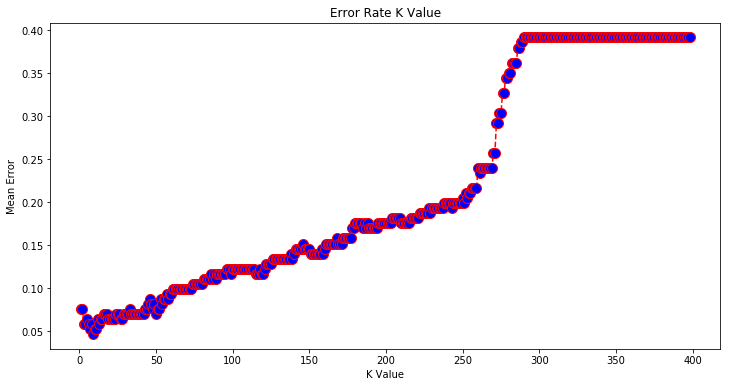

In [90]:
# Plotting Results
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 399), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

In [91]:
# Now Fitting the Optimal K
classifier = KNeighborsClassifier(n_neighbors=152)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=152, p=2,
           weights='uniform')

In [92]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[103   1]
 [ 23  44]]
             precision    recall  f1-score   support

          B       0.82      0.99      0.90       104
          M       0.98      0.66      0.79        67

avg / total       0.88      0.86      0.85       171

Accuracy: 0.8596491228070176


In [93]:
# Fitting the Optimal K=90
classifier = KNeighborsClassifier(n_neighbors=90)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='uniform')

In [94]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[102   2]
 [ 18  49]]
             precision    recall  f1-score   support

          B       0.85      0.98      0.91       104
          M       0.96      0.73      0.83        67

avg / total       0.89      0.88      0.88       171

Accuracy: 0.8830409356725146


In [95]:
# Fitting the Optimal K=60
classifier = KNeighborsClassifier(n_neighbors=60)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform')

In [96]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[103   1]
 [ 15  52]]
             precision    recall  f1-score   support

          B       0.87      0.99      0.93       104
          M       0.98      0.78      0.87        67

avg / total       0.92      0.91      0.90       171

Accuracy: 0.9064327485380117


In [97]:
# Fitting the Optimal K=3
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [98]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[102   2]
 [  8  59]]
             precision    recall  f1-score   support

          B       0.93      0.98      0.95       104
          M       0.97      0.88      0.92        67

avg / total       0.94      0.94      0.94       171

Accuracy: 0.9415204678362573
